In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/impact-of-climate-change-on-global-crop-yields/climate-ds.csv


This dataset contains agricultural data focused on various crop yields across different countries and years. It includes important environmental and agronomic variables such as average rainfall (mm per year), pesticide usage (tonnes), and average temperature (°C), along with categorical attributes like country (Area) and crop type (Item). The target variable, hg/ha_yield, represents crop productivity measured in hectograms per hectare. This diverse set of features allows for in-depth analysis of how environmental conditions and farming practices impact crop yields over time and across regions. The dataset is well-suited for building predictive models to support agricultural planning and policy-making.

In [21]:
#laoding data
data = pd.read_csv("/kaggle/input/impact-of-climate-change-on-global-crop-yields/climate-ds.csv")

In [22]:
#Viewing first rows
data.head(10)

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.0,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.0,16.37,7000
5,5,Albania,Wheat,1990,1485,121.0,16.37,30197
6,6,Albania,Maize,1991,1485,121.0,15.36,29068
7,7,Albania,Potatoes,1991,1485,121.0,15.36,77818
8,8,Albania,"Rice, paddy",1991,1485,121.0,15.36,28538
9,9,Albania,Sorghum,1991,1485,121.0,15.36,6667


In [23]:
pd.set_option('display.max_rows', 200)

In [5]:
# statical view of data
data.describe()

,Unnamed: 0,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,14120.500000,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,8152.907488,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,0.000000,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,7060.250000,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,14120.500000,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,21180.750000,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,28241.000000,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [24]:
data.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'hg/ha_yield'],
      dtype='object')

In [7]:
# info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
 7   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [25]:
data.shape

(28242, 8)

In [9]:
data.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


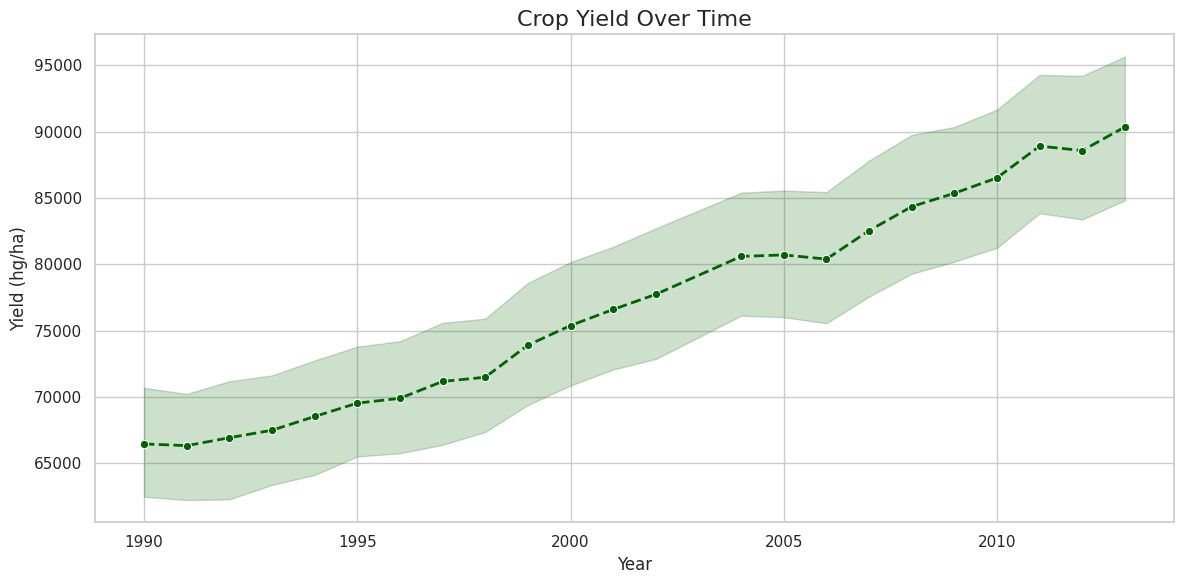

In [11]:

# Analyzing yield, over time
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(data = data, x='Year', y = 'hg/ha_yield', color='darkgreen', linestyle='--', marker='o', linewidth=2, markersize=6)
# Add title and labels
plt.title('Crop Yield Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yield (hg/ha)', fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

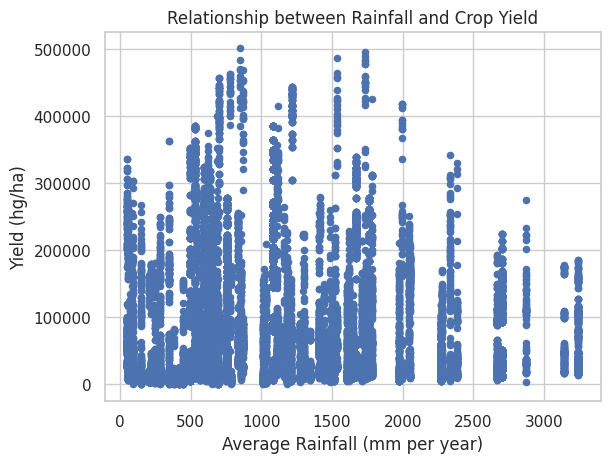

In [12]:
#Relationship between rainfall and highyield
data.plot(x ='average_rain_fall_mm_per_year', y = 'hg/ha_yield', kind='scatter')
plt.title('Relationship between Rainfall and Crop Yield')
plt.xlabel('Average Rainfall (mm per year)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

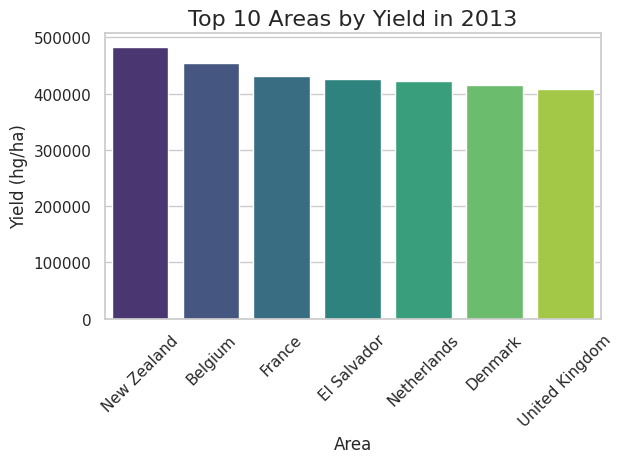

In [13]:
## Compare average yield by country (Area) for a specific year

# Example: Top 10 countries by yield in 2013
subset = data[data['Year'] == 2013].nlargest(10, 'hg/ha_yield')

sns.barplot(data = subset, x ='Area', y='hg/ha_yield', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Areas by Yield in 2013', fontsize=16)
plt.ylabel('Yield (hg/ha)', fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
pivot_df = data[data['Year'] == 2013].pivot_table(index='Area', values =['hg/ha_yield', 'pesticides_tonnes'], 
                                                  aggfunc='mean').nlargest(10, 'hg/ha_yield')
pivot_df

,hg/ha_yield,pesticides_tonnes
Area,,
United Kingdom,241415.500000,17673.46
Ireland,236627.000000,2950.80
Belgium,218497.000000,5905.60
Netherlands,209644.333333,10720.17
New Zealand,198951.250000,5086.00
Sweden,197677.500000,1620.00
Denmark,182621.666667,4118.00
Bahrain,179569.000000,9.14
Finland,159763.500000,1475.39


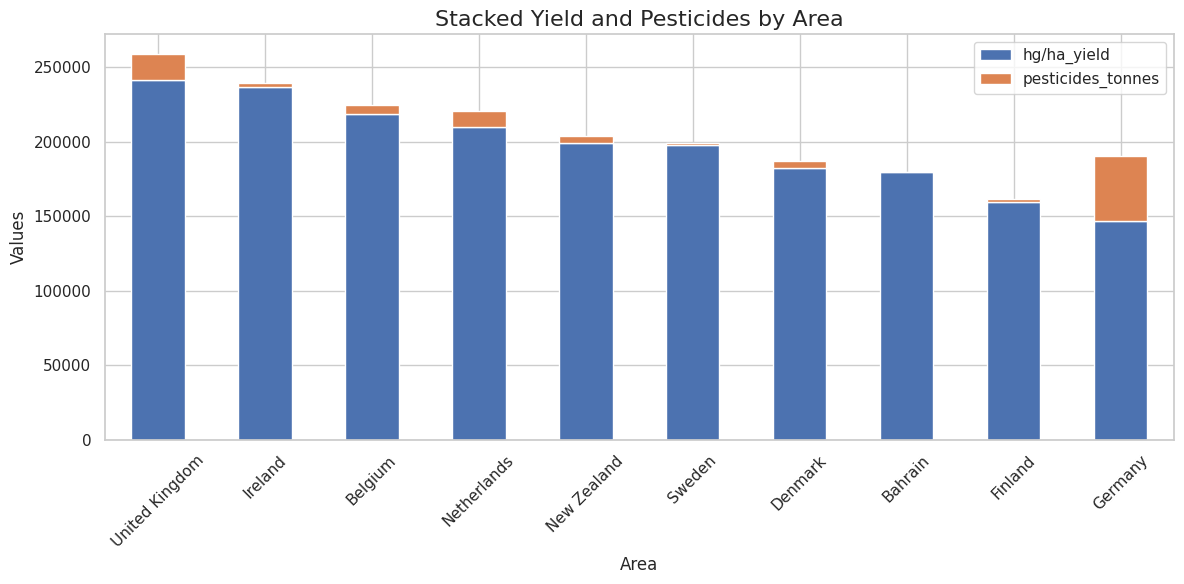

In [15]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Stacked Yield and Pesticides by Area', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

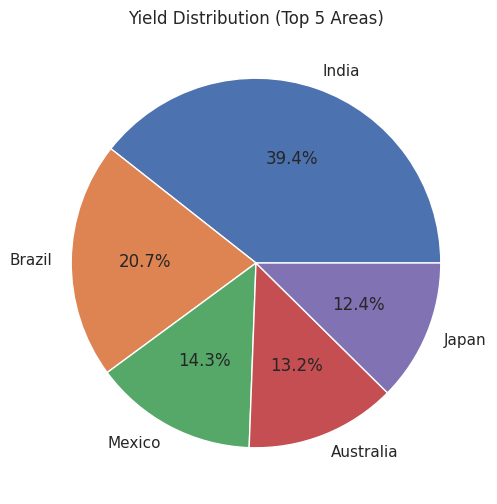

In [16]:
top5 = data[data['Year'] == 2013].groupby('Area')['hg/ha_yield'].sum().nlargest(5)
top5.plot(kind='pie', autopct = '%.1F%%', figsize=(6,6), title='Yield Distribution (Top 5 Areas)')
plt.ylabel('')
plt.show()

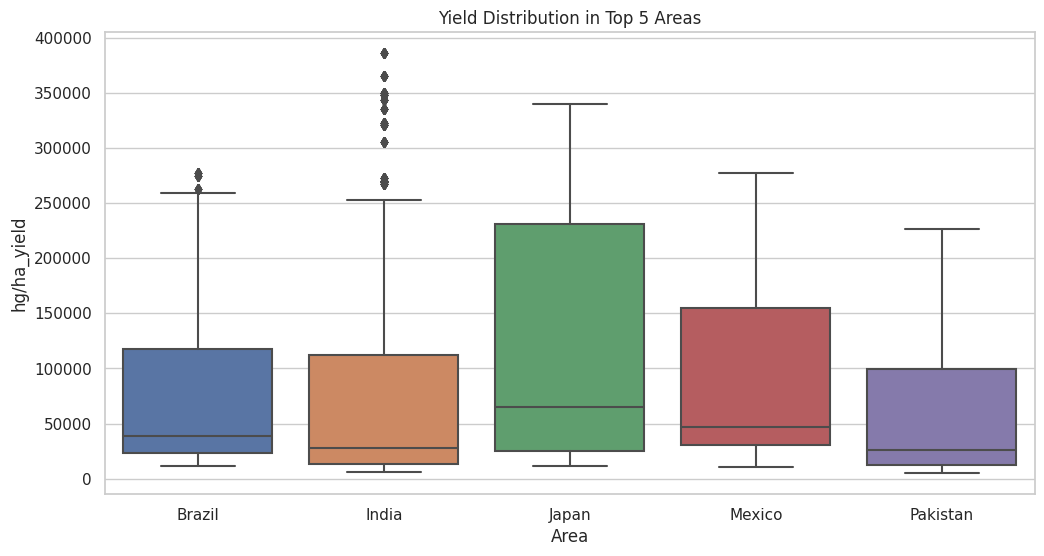

In [17]:
plt.figure(figsize=(12, 6))
top_countries = data['Area'].value_counts().head(5).index
sns.boxplot(data=data[data['Area'].isin(top_countries)], x='Area', y='hg/ha_yield')
plt.title('Yield Distribution in Top 5 Areas')
plt.show()


/tmp/ipykernel_31/3669747973.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


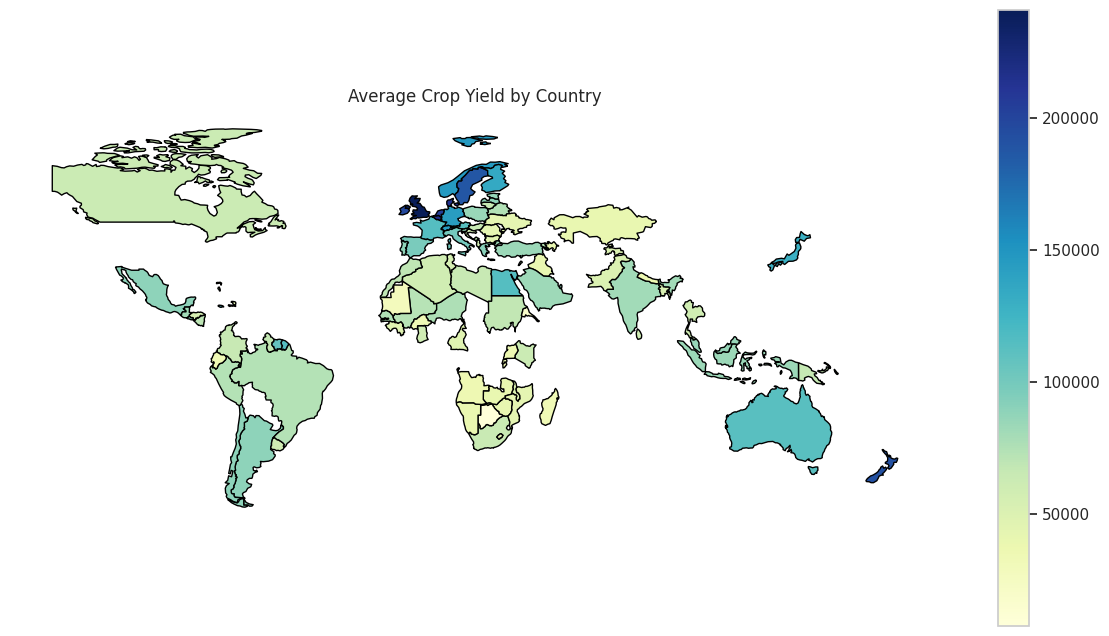

In [18]:
# You need geopandas and a mapping-ready dataset
import geopandas as gpd

# Example: Summarize yield per country
country_yield = data.groupby('Area')['hg/ha_yield'].mean().reset_index()

# Merge with world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_yield, left_on='name', right_on='Area')

# Plot
world.plot(column='hg/ha_yield', cmap='YlGnBu', legend=True, figsize=(15, 8), edgecolor='black')
plt.title('Average Crop Yield by Country')
plt.axis('off')
plt.show()


In [26]:
print(data.isnull().sum())

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64


**Model**



Predicting  agricultural crop yield (in hg/ha) using :

Location (Area)

Crop type (Item)

Average rainfall (mm/year)

Pesticide usage (tonnes)

Average temperature (°C)

This is a supervised regression problem, since the target variable (hg/ha_yield) is continuous.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [32]:
#Encoding categorical variables

le_area = LabelEncoder()
le_item = LabelEncoder()

data['Area'] = le_area.fit_transform(data['Area'])
data['Item'] = le_item.fit_transform(data['Item'])

In [33]:
#Define features and targets
X = data[['Area', 'Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = data['hg/ha_yield']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [36]:
#defining Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tress": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators = 100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators = 100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators = 100, random_state=42, verbosity=0)

}

In [41]:
#Train and evaluate models
result = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    result.append((name, r2, rmse))

# Display results
results_df = pd.DataFrame(result, columns=['Model', 'R2_Score', 'RMSE'])
print(results_df.sort_values(by='R2_Score', ascending=False))

               Model  R2_Score          RMSE
2      Random Forest  0.972908  14018.349718
4            XGBoost  0.965967  15711.866945
1     Decision Tress  0.958274  17397.363695
3  Gradient Boosting  0.826732  35451.776547
0  Linear Regression  0.078003  81779.339180


The comparison of regression models for predicting crop yield (hg/ha_yield) reveals that the Random Forest Regressor performed the best, achieving the highest R² score of 0.97 and the lowest RMSE of approximately 14,018, indicating a strong ability to explain the variance in yield based on environmental and categorical factors. XGBoost and the Decision Tree Regressor also performed well, with R² scores of 0.96 and 0.95, respectively, suggesting they effectively captured non-linear relationships in the data, though with slightly higher RMSE values. Gradient Boosting was moderately effective (R² = 0.83), while Linear Regression performed very poorly (R² = 0.08), indicating that a simple linear approach fails to model the complexity of the relationships in the dataset. Overall, tree-based ensemble methods clearly outperform linear models, highlighting the importance of capturing interactions and non-linear patterns in agricultural yield prediction.